In [49]:
#Importing required libraries
import pandas as pd
import numpy as np
import hvplot.pandas
import hvplot.dask
from pathlib import Path
from collections import Counter
import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import seaborn as sns

In [50]:
# Load the dataset

df = pd.read_csv(Path('../Resources/Mental_Health_Data.csv'))
df.head(10)

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,0,39,Male,United Kingdom,Sometimes,Not eligible for coverage,1.0,NaN,No,NaN,"No, none did",N/A (not currently aware),None did,Maybe,No
1,1,29,male,United States of America,Never,No,1.0,Yes,Yes,NaN,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes
2,2,38,Male,United Kingdom,Always,No,1.0,NaN,No,NaN,"No, none did",N/A (not currently aware),Some did,Maybe,No
3,3,43,male,United Kingdom,Sometimes,NaN,NaN,NaN,NaN,1.0,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes
4,4,43,Female,United States of America,Sometimes,Yes,0.0,Yes,No,NaN,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes
5,5,42,Male,United Kingdom,Sometimes,Yes,1.0,I am not sure,Yes,NaN,"No, none did","Yes, I was aware of all of them",None did,"Yes, I think it would",Yes
6,6,30,M,United States of America,Sometimes,I don't know,1.0,No,No,NaN,Some did,I was aware of some,Some did,"Yes, I think it would",No
7,7,37,female,United States of America,Always,Yes,1.0,Yes,Yes,NaN,Some did,I was aware of some,Some did,Maybe,Yes
8,8,44,Female,United States of America,Sometimes,I don't know,0.0,No,No,NaN,I don't know,N/A (not currently aware),None did,Maybe,Yes
9,9,30,Male,United States of America,Always,NaN,NaN,NaN,NaN,1.0,Some did,I was aware of some,None did,Maybe,Yes


In [84]:
# Begin SQLAlchemy 
from config import password

from sqlalchemy import create_engine
from sqlalchemy import inspect
url = "postgresql://postgres:" + password + "@localhost/Team_Two_Final"
engine = create_engine(url)

In [85]:
# Make a connection to the SQL database -- -- running into errors 

conn = engine.connect()

In [3]:
# Basic Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ID                                                     1433 non-null   int64  
 1   AGE                                                    1433 non-null   int64  
 2   GENDER                                                 1430 non-null   object 
 3   COUNTRY_WORKING_IN                                     1433 non-null   object 
 4   WFH                                                    1433 non-null   object 
 5   MENTAL_HEALTH_COVERAGE                                 1146 non-null   object 
 6   TECH_COMPANY                                           1146 non-null   float64
 7   MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                   1013 non-null   object 
 8   EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES          

In [4]:
# Describe the data

df.describe()

,ID,AGE,TECH_COMPANY,MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT
count,1433.00000,1433.000000,1146.000000,287.000000
mean,716.00000,34.286113,0.770506,0.644599
std,413.81578,11.290931,0.420691,0.479471
min,0.00000,3.000000,0.000000,0.000000
25%,358.00000,28.000000,1.000000,0.000000
50%,716.00000,33.000000,1.000000,1.000000
75%,1074.00000,39.000000,1.000000,1.000000
max,1432.00000,323.000000,1.000000,1.000000


In [5]:
# Check df for duplicates

df.duplicated().sum()

0

In [6]:
# Check df shape

df.shape

(1433, 15)

In [7]:
# Check df columns

df.columns

Index(['ID', 'AGE', 'GENDER', 'COUNTRY_WORKING_IN', 'WFH',
       'MENTAL_HEALTH_COVERAGE', 'TECH_COMPANY',
       'MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE',
       'EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
       'MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT',
       'PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS',
       'AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS',
       'PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
       'MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER',
       'CURRENT_MENTAL_HEALTH_DISORDER'],
      dtype='object')

In [8]:
# Find df null values

df.isnull().sum()

ID                                                          0
AGE                                                         0
GENDER                                                      3
COUNTRY_WORKING_IN                                          0
WFH                                                         0
MENTAL_HEALTH_COVERAGE                                    287
TECH_COMPANY                                              287
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                      420
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                    287
MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT       1146
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS             169
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS     169
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES               169
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                     0
CURRENT_MENTAL_HEALTH_DISORDER                              0
dtype: int64

In [5]:
# Drop MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT column from df

df.drop(['MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT'], axis=1, inplace=True)

In [51]:
# Replace null values in Gender column of df

df["GENDER"].fillna("NA", inplace = True)
df

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,0,39,Male,United Kingdom,Sometimes,Not eligible for coverage,1.0,NaN,No,NaN,"No, none did",N/A (not currently aware),None did,Maybe,No
1,1,29,male,United States of America,Never,No,1.0,Yes,Yes,NaN,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes
2,2,38,Male,United Kingdom,Always,No,1.0,NaN,No,NaN,"No, none did",N/A (not currently aware),Some did,Maybe,No
3,3,43,male,United Kingdom,Sometimes,NaN,NaN,NaN,NaN,1.0,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes
4,4,43,Female,United States of America,Sometimes,Yes,0.0,Yes,No,NaN,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1428,34,Female,United States of America,Sometimes,NaN,NaN,NaN,NaN,1.0,"Yes, they all did",I was aware of some,Some did,Maybe,No
1429,1429,56,MALE,Afghanistan,Sometimes,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,"No, it has not",No
1430,1430,52,Male,United States of America,Sometimes,Yes,1.0,Yes,Yes,NaN,Some did,I was aware of some,Some did,"Yes, it has",Maybe
1431,1431,30,Female,United States of America,Sometimes,I don't know,0.0,I am not sure,Yes,NaN,"No, none did",N/A (not currently aware),None did,"No, I don't think it would",Yes


In [52]:
# Replace null values in MENTAL_HEALTH_COVERAGE column of df

df["MENTAL_HEALTH_COVERAGE"].fillna("NA", inplace = True)

In [53]:
# Replace null values in TECH_COMPANY column of df

df["TECH_COMPANY"].fillna("NA", inplace = True)

In [54]:
# Replace null values in MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE column of df

df["MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE"].fillna("NA", inplace = True)

In [55]:
# Replace null values in EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  column of df

df["EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES"].fillna("NA", inplace = True)

In [56]:
# Replace null values in PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS column of df

df["PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS"].fillna("NA", inplace = True)

In [57]:
# Replace null values in AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS column of df

df["AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS"].fillna("NA", inplace = True)

In [58]:
# Replace null values in PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES column of df

df["PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES"].fillna("NA", inplace = True)

In [59]:
df['GENDER'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['GENDER'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["GENDER"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Queer', inplace = True)

In [60]:
df.to_csv('New_Clean_Mental_Health_Data.csv')

In [62]:
df.head(15)

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,0,39,Male,United Kingdom,Sometimes,Not eligible for coverage,1.0,NA,No,NaN,"No, none did",N/A (not currently aware),None did,Maybe,No
1,1,29,Male,United States of America,Never,No,1.0,Yes,Yes,NaN,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes
2,2,38,Male,United Kingdom,Always,No,1.0,NA,No,NaN,"No, none did",N/A (not currently aware),Some did,Maybe,No
3,3,43,Male,United Kingdom,Sometimes,NA,NA,NA,NA,1.0,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes
4,4,43,Female,United States of America,Sometimes,Yes,0.0,Yes,No,NaN,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes
5,5,42,Male,United Kingdom,Sometimes,Yes,1.0,I am not sure,Yes,NaN,"No, none did","Yes, I was aware of all of them",None did,"Yes, I think it would",Yes
6,6,30,Male,United States of America,Sometimes,I don't know,1.0,No,No,NaN,Some did,I was aware of some,Some did,"Yes, I think it would",No
7,7,37,Female,United States of America,Always,Yes,1.0,Yes,Yes,NaN,Some did,I was aware of some,Some did,Maybe,Yes
8,8,44,Female,United States of America,Sometimes,I don't know,0.0,No,No,NaN,I don't know,N/A (not currently aware),None did,Maybe,Yes
9,9,30,Male,United States of America,Always,NA,NA,NA,NA,1.0,Some did,I was aware of some,None did,Maybe,Yes


In [16]:
# Find null values of df

df.isnull().sum()

ID                                                       0
AGE                                                      0
GENDER                                                   0
COUNTRY_WORKING_IN                                       0
WFH                                                      0
MENTAL_HEALTH_COVERAGE                                   0
TECH_COMPANY                                             0
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     0
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   0
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            0
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    0
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              0
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  0
CURRENT_MENTAL_HEALTH_DISORDER                           0
dtype: int64

In [17]:
# Check datatypes of df

df.dtypes

ID                                                        int64
AGE                                                       int64
GENDER                                                   object
COUNTRY_WORKING_IN                                       object
WFH                                                      object
MENTAL_HEALTH_COVERAGE                                   object
TECH_COMPANY                                             object
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     object
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   object
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            object
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    object
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              object
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  object
CURRENT_MENTAL_HEALTH_DISORDER                           object
dtype: object

In [18]:
df.describe()

,ID,AGE
count,1433.00000,1433.000000
mean,716.00000,34.286113
std,413.81578,11.290931
min,0.00000,3.000000
25%,358.00000,28.000000
50%,716.00000,33.000000
75%,1074.00000,39.000000
max,1432.00000,323.000000


In [21]:
# View MENTAL_HEALTH_COVERAGE data only

df.hvplot.table(columns=['MENTAL_HEALTH_COVERAGE'], sortable=True, selectable=True)

:Table   [MENTAL_HEALTH_COVERAGE]

In [22]:
# Converting Target to an integer to avoid being encoded

df['MENTAL_HEALTH_COVERAGE'] = df['MENTAL_HEALTH_COVERAGE'].replace(['Yes','No','NA',"Not eligible for coverage","I don't know","Not eligible for coverage "], [1,0,0,0,0,0])

df.head(10)

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,0,39,Male,United Kingdom,Sometimes,0,1.0,NA,No,"No, none did",N/A (not currently aware),None did,Maybe,No
1,1,29,male,United States of America,Never,0,1.0,Yes,Yes,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes
2,2,38,Male,United Kingdom,Always,0,1.0,NA,No,"No, none did",N/A (not currently aware),Some did,Maybe,No
3,3,43,male,United Kingdom,Sometimes,0,NA,NA,NA,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes
4,4,43,Female,United States of America,Sometimes,1,0.0,Yes,No,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes
5,5,42,Male,United Kingdom,Sometimes,1,1.0,I am not sure,Yes,"No, none did","Yes, I was aware of all of them",None did,"Yes, I think it would",Yes
6,6,30,M,United States of America,Sometimes,0,1.0,No,No,Some did,I was aware of some,Some did,"Yes, I think it would",No
7,7,37,female,United States of America,Always,1,1.0,Yes,Yes,Some did,I was aware of some,Some did,Maybe,Yes
8,8,44,Female,United States of America,Sometimes,0,0.0,No,No,I don't know,N/A (not currently aware),None did,Maybe,Yes
9,9,30,Male,United States of America,Always,0,NA,NA,NA,Some did,I was aware of some,None did,Maybe,Yes


In [23]:
df.hvplot.table(columns=['MENTAL_HEALTH_COVERAGE'], sortable=True, selectable=True)

:Table   [MENTAL_HEALTH_COVERAGE]

In [24]:
# Check the types after changing data type to a integer

df.dtypes

ID                                                        int64
AGE                                                       int64
GENDER                                                   object
COUNTRY_WORKING_IN                                       object
WFH                                                      object
MENTAL_HEALTH_COVERAGE                                    int64
TECH_COMPANY                                             object
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     object
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   object
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            object
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    object
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              object
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  object
CURRENT_MENTAL_HEALTH_DISORDER                           object
dtype: object

In [25]:
# This allows us to get a feature list

application_cat = df.dtypes[df.dtypes == "object"].index.tolist()
application_cat

['GENDER',
 'COUNTRY_WORKING_IN',
 'WFH',
 'TECH_COMPANY',
 'MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE',
 'EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
 'PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS',
 'AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS',
 'PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
 'MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER',
 'CURRENT_MENTAL_HEALTH_DISORDER']

In [26]:
# Changes TECH_COMPANY to an integer to be encoded 

df['TECH_COMPANY'] = df['TECH_COMPANY'].replace([1.0,0.0], ['Yes','No'])
df.head(10)

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,0,39,Male,United Kingdom,Sometimes,0,Yes,NA,No,"No, none did",N/A (not currently aware),None did,Maybe,No
1,1,29,male,United States of America,Never,0,Yes,Yes,Yes,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes
2,2,38,Male,United Kingdom,Always,0,Yes,NA,No,"No, none did",N/A (not currently aware),Some did,Maybe,No
3,3,43,male,United Kingdom,Sometimes,0,NA,NA,NA,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes
4,4,43,Female,United States of America,Sometimes,1,No,Yes,No,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes
5,5,42,Male,United Kingdom,Sometimes,1,Yes,I am not sure,Yes,"No, none did","Yes, I was aware of all of them",None did,"Yes, I think it would",Yes
6,6,30,M,United States of America,Sometimes,0,Yes,No,No,Some did,I was aware of some,Some did,"Yes, I think it would",No
7,7,37,female,United States of America,Always,1,Yes,Yes,Yes,Some did,I was aware of some,Some did,Maybe,Yes
8,8,44,Female,United States of America,Sometimes,0,No,No,No,I don't know,N/A (not currently aware),None did,Maybe,Yes
9,9,30,Male,United States of America,Always,0,NA,NA,NA,Some did,I was aware of some,None did,Maybe,Yes


In [44]:
# Correlation Matrix

df.corr(method='pearson')

,ID,AGE,MENTAL_HEALTH_COVERAGE
ID,1.000000,-0.021424,-0.051657
AGE,-0.021424,1.000000,0.059794
MENTAL_HEALTH_COVERAGE,-0.051657,0.059794,1.000000


<AxesSubplot:>

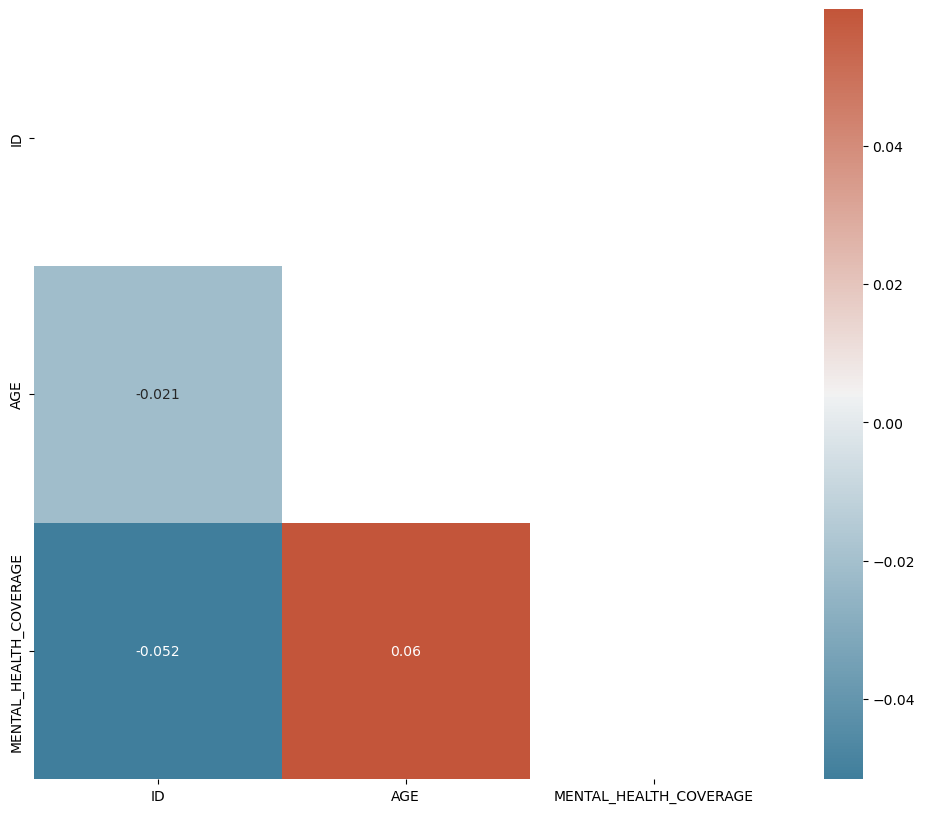

In [46]:
c=df.corr(method='pearson')

# code borrowed from Instructor Nicole L.
# Set up the matplotlib plot configuration

f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle

mask = np.triu(np.ones_like(c, dtype=bool))

# Configure a custom diverging colormap

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap

sns.heatmap(c, annot=True, mask = mask, cmap=cmap)

In [28]:
#Attempt to convert 'AGE' from string to float
df['AGE'] = df['AGE'].astype(int)

In [29]:
#Attempt to convert 'MENTAL_HEALTH_COVERAGE' from string to float
df['MENTAL_HEALTH_COVERAGE'] = df['MENTAL_HEALTH_COVERAGE'].astype(int)

In [30]:
# Check the datatypes
df.dtypes

ID                                                        int64
AGE                                                       int32
GENDER                                                   object
COUNTRY_WORKING_IN                                       object
WFH                                                      object
MENTAL_HEALTH_COVERAGE                                    int32
TECH_COMPANY                                             object
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     object
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   object
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            object
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    object
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              object
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  object
CURRENT_MENTAL_HEALTH_DISORDER                           object
dtype: object

In [82]:
df.loc[df['AGE']<=30, 'AGE_GROUP'] = '0-20'
df.loc[df['AGE'].between(21,29), 'AGE_GROUP'] = '20'
df.loc[df['AGE'].between(30,39), 'AGE_GROUP'] = '30'
df.loc[df['AGE'].between(40,49), 'AGE_GROUP'] = '40'
df.loc[df['AGE'].between(50,59), 'AGE_GROUP'] = '50'
df.loc[df['AGE'].between(60,69), 'AGE_GROUP'] = '60'
df.head(20)

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [69]:
df.head(20)

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER,AGE_GROUP
0,0,39,Male,United Kingdom,Sometimes,Not eligible for coverage,1.0,NA,No,NaN,"No, none did",N/A (not currently aware),None did,Maybe,No,30's
1,1,29,Male,United States of America,Never,No,1.0,Yes,Yes,NaN,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes,20's
2,2,38,Male,United Kingdom,Always,No,1.0,NA,No,NaN,"No, none did",N/A (not currently aware),Some did,Maybe,No,30's
3,3,43,Male,United Kingdom,Sometimes,NA,NA,NA,NA,1.0,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes,40's
4,4,43,Female,United States of America,Sometimes,Yes,0.0,Yes,No,NaN,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes,40's
5,5,42,Male,United Kingdom,Sometimes,Yes,1.0,I am not sure,Yes,NaN,"No, none did","Yes, I was aware of all of them",None did,"Yes, I think it would",Yes,40's
6,6,30,Male,United States of America,Sometimes,I don't know,1.0,No,No,NaN,Some did,I was aware of some,Some did,"Yes, I think it would",No,20's
7,7,37,Female,United States of America,Always,Yes,1.0,Yes,Yes,NaN,Some did,I was aware of some,Some did,Maybe,Yes,30's
8,8,44,Female,United States of America,Sometimes,I don't know,0.0,No,No,NaN,I don't know,N/A (not currently aware),None did,Maybe,Yes,40's
9,9,30,Male,United States of America,Always,NA,NA,NA,NA,1.0,Some did,I was aware of some,None did,Maybe,Yes,20's


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

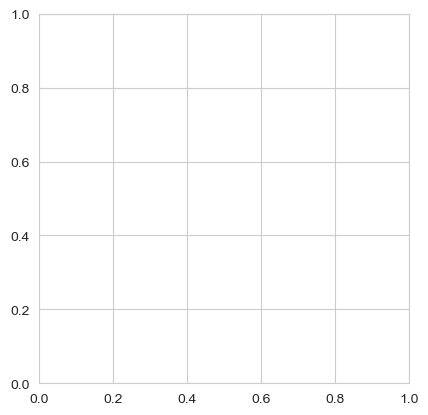

In [80]:
#Pie chart of Age of Respondants
#Maybe split this up into age ranges?
y = np.array(df['AGE_GROUP'])
mylabels = (df['AGE_GROUP'])
plt.pie(y, labels = mylabels)
plt.legend()
plt.title("AGE Groups of Respondants")
plt.show()

In [28]:
# clean "Gender" column

df.GENDER = df.GENDER.str.lower()
male = ["male", "m", "male-ish", "sex is male", "male.", "male (trans, ftm)", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male",
         "nb masculine", "male 9:1 female, roughly", "cisdude", "m|", "I'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
         "male/genderqueer", ]
female = ["cis female", "female", "cis-woman", "female-bodied; no feelings about gender", "cisgender female", "f", "fm", "female", "female/woman", "woman",  "femake", "female ", "cis-female/femme", "female (cis)", "femail", "i identify as female.", "female (props for making this a freeform field, though)", 
           "genderqueer woman", "fem", "genderflux demi-girl", "transgender woman", "female assigned at birth"]
other = ["other", "bigender", "female assigned at birth", "trans-female", "something kinda male?", "queer/she/they", "non-binary", "nonbinary", "na", "nah", 
         "human", "all", "enby", "fluid", "other/transfeminine", "androgynous", "" 
         "genderqueer", "androgyne", "agender", "mtf", "dude", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", 
         "female (trans)", "queer", "ostensibly male, unsure what that really means", "p", "a little about you", "none of your business", "afab", 
         "genderfluid", "unicorn"]

df.GENDER.loc[df.GENDER.isin(male)] = 'male'
df.GENDER.loc[df.GENDER.isin(female)] = 'female'
df.GENDER.loc[df.GENDER.isin(other)] = 'others'

# color palette for seaborn
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# List gender values
gender_values = df.GENDER.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'GENDER': 'count'})
table_gender = gender_values.style.background_gradient(cmap=cmap)
table_gender

,count
male,1059
female,339
others,28
female assigned at birth,1
cis female,1
"transitioned, m2f",1
genderfluid (born female),1
female or multi-gender femme,1
i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?,1
female,1


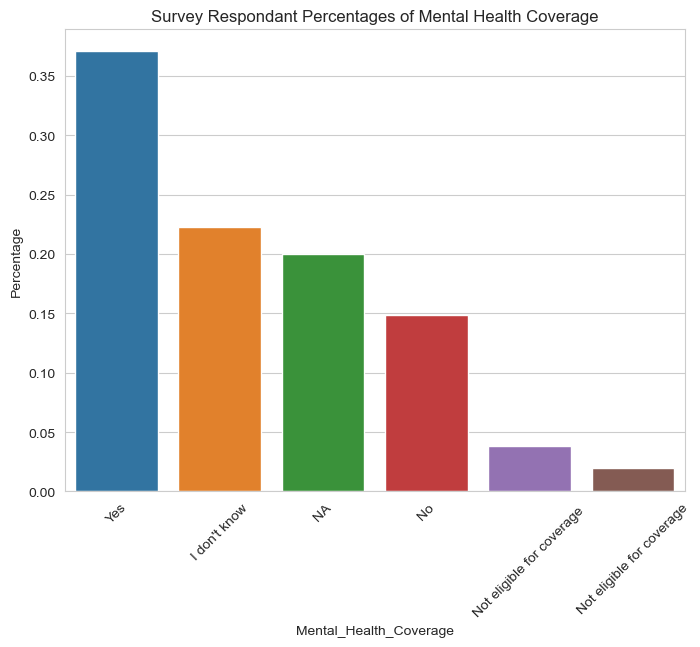

In [37]:
# Bar plot to show percentages of Mental Health Coverage by survery respondants

sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
eda_percentage = df['MENTAL_HEALTH_COVERAGE'].value_counts(normalize = True).rename_axis('Mental_Health_Coverage').reset_index(name = 'Percentage')
sns.barplot(x = 'Mental_Health_Coverage', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Survey Respondant Percentages of Mental Health Coverage')
plt.xticks(rotation = 45)
plt.show()

[]

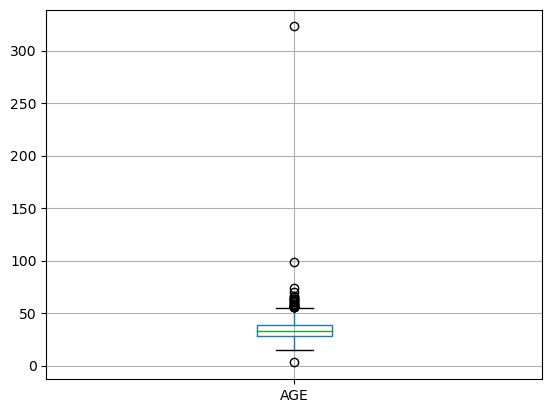

In [33]:
# Boxplot of Age column
b_plot = df.boxplot(column = 'AGE') 
b_plot.plot()

[]

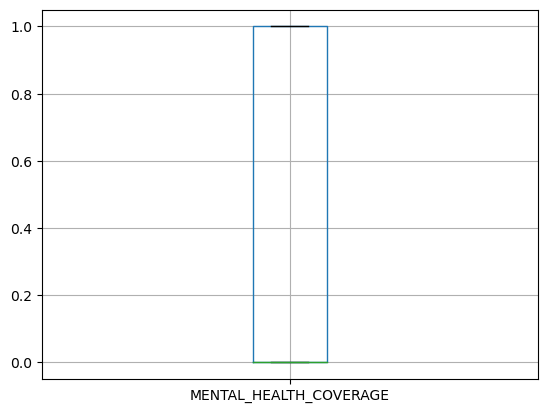

In [34]:
# Boxplot mental health coverage 
mh_plot = df.boxplot(column = 'MENTAL_HEALTH_COVERAGE') 
mh_plot.plot()

In [35]:
# Create a OneHotEncoder instance

enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list

encode_df = pd.DataFrame(enc.fit_transform(df[application_cat]))

# Add the encoded variable names to the dataframe

encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,GENDER_ Female,GENDER_AFAB,GENDER_Agender,GENDER_Androgynous,GENDER_Bigender,GENDER_Cis Male,GENDER_Cis female,GENDER_Cis male,GENDER_Cis-woman,GENDER_Cisgender Female,...,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES_Some did,"PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES_Yes, they all did",MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Maybe,"MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_No, I don't think it would","MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_No, it has not","MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Yes, I think it would","MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Yes, it has",CURRENT_MENTAL_HEALTH_DISORDER_Maybe,CURRENT_MENTAL_HEALTH_DISORDER_No,CURRENT_MENTAL_HEALTH_DISORDER_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
# Merge and delete encoded columns

application_df = df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,ID,AGE,MENTAL_HEALTH_COVERAGE,GENDER_ Female,GENDER_AFAB,GENDER_Agender,GENDER_Androgynous,GENDER_Bigender,GENDER_Cis Male,GENDER_Cis female,...,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES_Some did,"PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES_Yes, they all did",MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Maybe,"MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_No, I don't think it would","MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_No, it has not","MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Yes, I think it would","MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Yes, it has",CURRENT_MENTAL_HEALTH_DISORDER_Maybe,CURRENT_MENTAL_HEALTH_DISORDER_No,CURRENT_MENTAL_HEALTH_DISORDER_Yes
0,0,39,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,38,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,43,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,43,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [37]:
# Create our features

X = application_df.drop(columns="MENTAL_HEALTH_COVERAGE").values

# Create our target
y =application_df['MENTAL_HEALTH_COVERAGE'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

Counter(y_train)

Counter({1: 398, 0: 676})

In [38]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Fitting the model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=200,
   random_state=1)

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [40]:
# Making predictions using the testing data.

y_pred = classifier.predict(X_test)

In [41]:
# Calculated the balanced accuracy score

from sklearn.metrics import accuracy_score

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.8328690807799443

In [42]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,204,22
Actual 1,38,95


In [43]:
# Print the imbalanced classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       226
           1       0.81      0.71      0.76       133

    accuracy                           0.83       359
   macro avg       0.83      0.81      0.82       359
weighted avg       0.83      0.83      0.83       359

